## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2016-2020 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.main import Report, pd, show_cluster_list, plt


In [2]:
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)
# report_20.data.save_csv_table()
report_20.data.save_gephi_edges()
report_20.data.save_gephi_nodes()


{512, 516, 8, 12, 528, 31, 32, 36, 40, 554, 562, 51, 566, 56, 579, 68, 70, 72, 586, 76, 591, 598, 604, 608, 100, 616, 104, 620, 116, 634, 124, 642, 643, 144, 152, 156, 682, 170, 688, 690, 178, 180, 699, 702, 704, 705, 706, 196, 710, 203, 716, 204, 208, 724, 214, 218, 222, 231, 232, 233, 748, 752, 757, 246, 762, 251, 764, 268, 784, 276, 792, 800, 804, 807, 300, 818, 826, 320, 834, 842, 344, 860, 348, 352, 360, 364, 372, 376, 381, 894, 384, 392, 398, 404, 410, 417, 418, 422, 442, 450, 454, 458, 478, 484, 496, 499, 504, 508}


In [2]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)
report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [3]:
reports = [report_11, report_12, report_13, report_14, report_15,
           report_16, report_17, report_18, report_19, report_20]


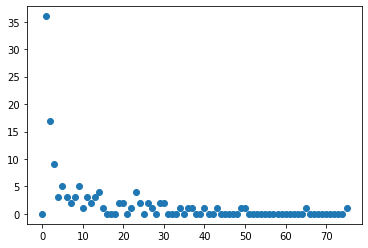

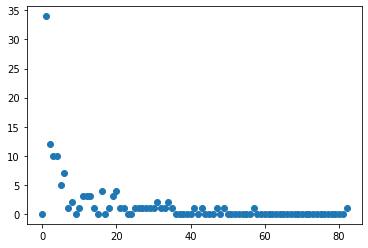

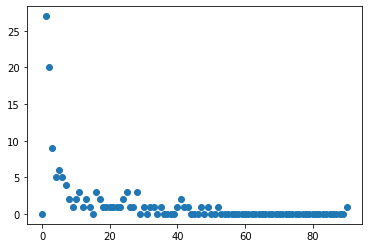

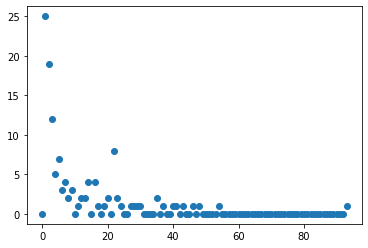

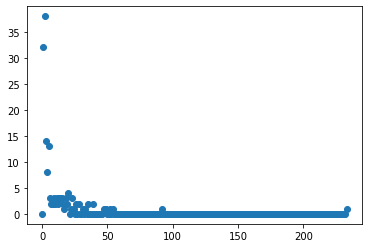

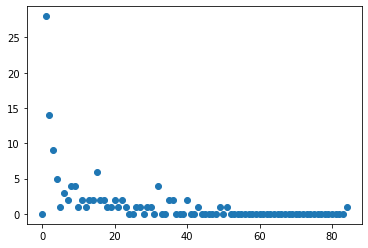

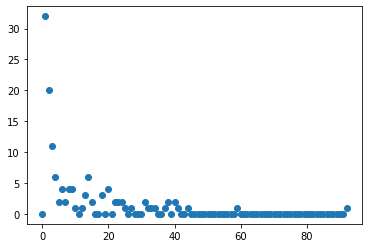

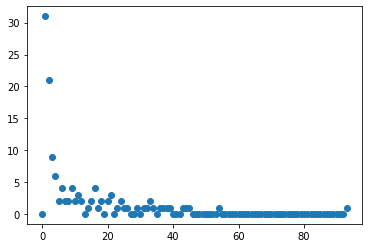

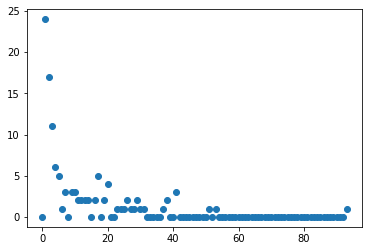

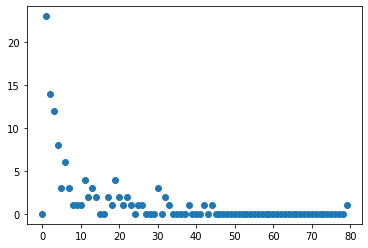

In [4]:
import networkx as nx
for report in reports:
    frequency = nx.degree_histogram(report.G)
    spl = nx.shortest_path_length(report.G)
    Ls = 0
    ps = 0
    for u, v in spl:
        ls = [l for _, l in v.items()]
        ps += len(ls)
        Ls += sum(ls)
    fig, axes = plt.subplots()
    x = list(range(0, len(frequency)))
    axes.scatter(x, frequency)


### 1.2 数据分析与检验*

以 2019 年数据为例，进行数据分析与检验

1. 获取贸易参与者

In [5]:
report_19.check_data()


上报进贸易记录的国家总数（不含重复）:  85
上报进贸易记录的中的贸易对象国家总数（不含重复）:  104
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  114


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [6]:
report_19.view_logs_by_china()


中国上报的进口记录中，涉及出口国家的个数:  93


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,156,China,784,United Arab Emirates,Import,70360785,53964805,53964805.0
1,156,China,792,Turkey,Import,60658162,59904304,59904304.0
2,156,China,826,United Kingdom,Import,74307,60000,60000.0
3,156,China,834,United Rep. of Tanzania,Import,8523190,2182580,2182580.0
4,156,China,842,USA,Import,13566717,9074822,9074822.0
...,...,...,...,...,...,...,...,...
88,724,Spain,156,China,Export,746141115,633941004,633941004.0
89,792,Turkey,156,China,Export,76043743,86924900,86924900.0
90,842,USA,156,China,Export,4248920,7546469,7546469.0
91,704,Viet Nam,156,China,Export,71467,59429,59429.0


        2. 查看中国进口对象上报的对中国的出口记录

In [7]:
report_19.view_logs_about_china()


全球上报了对中国有出口记录的国家 31


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,56,Belgium,156,China,Import,10336,2149,2149.0
1,96,Brunei Darussalam,156,China,Import,16143,100000,100000.0
2,100,Bulgaria,156,China,Import,1850,74,74.0
3,116,Cambodia,156,China,Import,576278,1155237,1155237.0
4,124,Canada,156,China,Import,161,36,36.0
5,152,Chile,156,China,Import,10647,341,341.0
6,344,"China, Hong Kong SAR",156,China,Import,124228,334780,334780.0
7,180,Dem. Rep. of the Congo,156,China,Import,539,5,5.0
8,222,El Salvador,156,China,Import,43,3,3.0
9,251,France,156,China,Import,6,1,1.0


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建有向加权网络是合适的，具体如下：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），贸易金额为权重，构建有向加权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

3. 对于贸易金额，若两方上报金额不一致则取两者均值
  

绘制网络（以 2020 年为例）：

In [8]:
# report_20.net.draw()


## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的加重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

## 4. 实验和结果

### 4.1 求各节点的连接信息熵
根据第 3 节给出的定义，求各节点的连接信息熵，并将前 20 的连接信息熵绘图如下：

*实验中取 $\theta, \lambda = 0.7$.*

In [9]:
'''
for report in reports:
    print(report.name + '年连接信息熵分布')
    report.net.drawEntropiesBar()
'''


"\nfor report in reports:\n    print(report.name + '年连接信息熵分布')\n    report.net.drawEntropiesBar()\n"

In [10]:

report_12.draw_entropy_plot(20)

TypeError: 'dict' object is not callable

In [ ]:
plt.figure(figsize=(10, 4))
report_11.draw_entropy_plot(20)
report_12.draw_entropy_plot(20)
report_13.draw_entropy_plot(20)
report_14.draw_entropy_plot(20)
report_15.draw_entropy_plot(20)

report_16.draw_entropy_plot(20)
report_17.draw_entropy_plot(20)
report_18.draw_entropy_plot(20)
report_19.draw_entropy_plot(20)
report_20.draw_entropy_plot(20)
plt.show()


从上表可以看出，中国、欧盟等铜贸易大国位列前茅，且前二十名均为贸易和工业水平发达的国家，说明使用“连接信息熵”来衡量铜贸易网络节点的重要性具备一定的合理性.

### 4.2 层次聚类
对个节点的信息熵进行层次聚类，选择聚类数为 6；并为每个节点设置聚类标签，按熵值从大到小标记为 1 - 6

### 4.3 选取属性并进行离散化划分

选取以下属性，并选择聚类层数：

* IS：入强度, 6 层，反应进口贸易总额
* OS: 出强度，6 层，反应出口贸易总额
* DC: 度中心性，6 层，反应贸易伙伴的数量
* BC: 中介中心性，6 层，反应在贸易网络中的枢纽性质（不考虑权重）
* CC: 接近中心性，6 层，反应与其他贸易者之间的平均距离（不考虑权重）

属性值由大到小标记为 1-6

In [ ]:
cluster_list = show_cluster_list(reports, label_name="E")


In [ ]:
cluster_list


In [ ]:
writer = pd.ExcelWriter('cluster_list.xlsx')
cluster_list.to_excel(writer, float_format='%.5f')
writer.save()


In [ ]:
report_19.show_nodes_attribute()


上表以 2019 年数据，展示了各个节点的 5 个条件属性及 1 个决策属性所在的层次序号（1-6）

### 4.5 生成决策树

使用 ID3 算法生成决策树

In [ ]:
for report in reports:
    report.decision_tree
    report.show_dt_accuracy()
    report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')


决策树（2019）：

![decistion_tree](outputs/decision_tree.png)

根据决策树生成决策表：

In [ ]:
for report in reports:
    report.set_attribute_probability()
    report.decision_list


In [ ]:
pd.DataFrame(report_19.decision_list)[
    report_19.attribute_names + ['label']].sort_values('label')


上表展示了决策树中的 86 条决策规则中各条件属性和决策属性的取值，NaN 表示该条件属性无需判断.

例如若某一结点 DC 属性值为 1，则无需判断其余属性即可得到该节点的决策属分区为 1 的决策结论. 事实上，仅有中国的 DC 为 1，且仅有中国决策属性为 1，所以继续判断其余属性时多余的.

### 4.6 层次风险模型

1. 条件属性的概率分布

$$
p_{jA_i} = \frac{\#jA_i}{N}
$$

其中 $A_i$ 表示条件属性，$jA_i$ 表示条件属性 $A_i$ 的属性取值. $\#jA_i$ 表示属性 $A_i$ 取 $j$ 时的样本数，$N$ 表示总样本数。


下面计算各个条件属性的概率分布：

In [ ]:
for report in reports:
    report.set_attribute_probability()


2. 决策规则的概率分布

$$
    P_{\text{Rule}l} = p_{jA_i}\cdots p_{jA_p}
$$

其中，$p_{jA_k}$ 表示在决策规则 $l$ 中对应的各条件属性 $A_k$ 的取值为 $j$ 的概率.

*这里将各条件属性的分布近似看做为相互独立，即某条件属性的取值不受其他条件属性取值的影响*

下面计算各个决策规则的概率分布：

下面绘制决策规则的概率分布柱状图：

In [ ]:
for report in reports:
    report.decision_probability_bar()


以第一个图为例，使用柱状图的形式展示了 86 条决策规则的概率值，并且按照决策规则的最终决策属性的取值进行了分区. 例如，决策结果为 1 的决策规则只有 1 条，其概率约为 $0.008403$，即图中从左数第一根柱形图.

3. 节点脆弱性风险

节点脆弱性在对应离散分区下的层次风险：

$$
  P_j = \sum_{l=1}^MP_{\text{Rule}l}(j_{A_n})
$$

$P_j$ 表示了对于任意节点，通过决策树，做出决策属性为 $j$ 的概率，即各个决策属性为 $j$ 的决策规则的概率求和.
  

In [ ]:
for report in reports:
    report.get_hierarchical_risk()
    print(report.name + '年层次风险分布')
    report.hierarchical_risk_bar()


上图展示了各个决策属性的概率分布，其中决策属性为 $1,2,3$ 的概率值较小，决策属性为 $4,5,6$ 的概率较大，决策属性为 $6$ 的概率尤其大.

In [ ]:
import numpy as np

xs = np.arange(10) + 1 + 2
xs = [[1, 2], [2, 3]]


In [ ]:
[x for j in xs for x in j]


In [ ]:
[x for j in xs for x in j]


In [ ]:
res = []
for j in xs:
    for x in j:
        res.append(x)

res


In [ ]:
ps = [[0.008264462809917356], [0.008264462809917356], [2.4986135284033322e-05, 0.0001249306764201666, 0.0007745701938050329, 7.495840585209997e-05, 0.0006496395173848664], [0.0024588484393142547, 2.201448327209732e-05, 0.0001100724163604866, 0.0006824489814350169, 6.604344981629197e-05, 0.0005723765650745303], [0.00020490403660952122, 0.00020490403660952122, 0.0006147121098285637, 0.00020490403660952122, 0.021105115770780686, 0.0008879174919745919, 0.0008879174919745919, 0.0012107965799653525, 0.0008879174919745919,
                                                                                                                                                                                                                                                                                                                         0.010655009903695103, 0.000755830592342008, 0.001511661184684016, 0.000755830592342008, 0.0001561633455252083, 0.0001561633455252083, 0.0003123266910504166, 0.0001561633455252083, 0.0007808167276260414, 0.06651309212609671, 0.020490403660952124], [0.0013742374406218326, 0.01733413135329812, 0.23140495867768596, 0.005122600915238031, 0.010245201830476062, 0.005122600915238031, 0.12806502288095076, 0.0037255279383549313, 0.018627639691774656, 0.20490403660952122, 0.11549136608900286, 0.011176583815064794, 0.09686372639722822]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(10, 8))

width = 1
group_gap = 5

# fig, ax = plt.subplots()

last_index = 0
ind = []
xs = []

for i in range(0, 6):
    group_len = len(ps[i])

    x = np.arange(group_len) + last_index + group_gap
    xs.append(x)

    last_index = x[-1]

    plt.bar(x, ps[i], width)


ind = [x for j in xs for x in j]

x_labels = ['' for _ in range(len(ind))]

former_index = 0
for i, x in enumerate(xs):
    x_labels[former_index + int(len(x) / 2)] = i + 1
    former_index += len(x)

# plt.xticklabels(x_labels, fontsize=14)

plt.ylabel(r"$P_{Path_l}$", fontsize=20)
# plt.xticks(ind, [i + 1 for i in range(len(xs))])
plt.xticks(ind, x_labels)

print(ind, x_labels)

plt.show()


In [ ]:
a = -1
b = 2
abs(a)


In [ ]:
import numpy as np
print(np.arange(1, 20, 2))
